In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("simulation.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([1181, 1182]), array([104, 104]))
-0.0013598304560067493


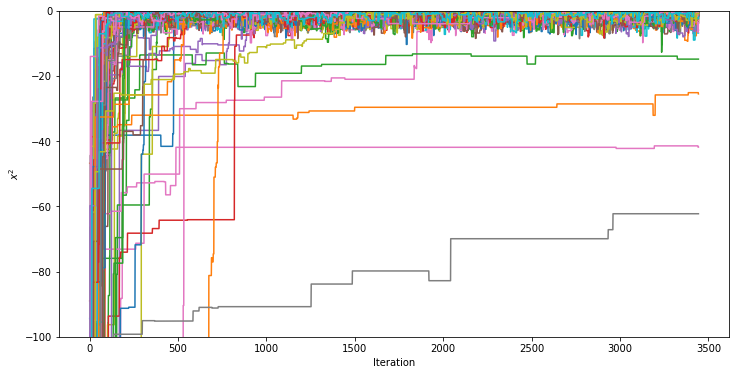

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

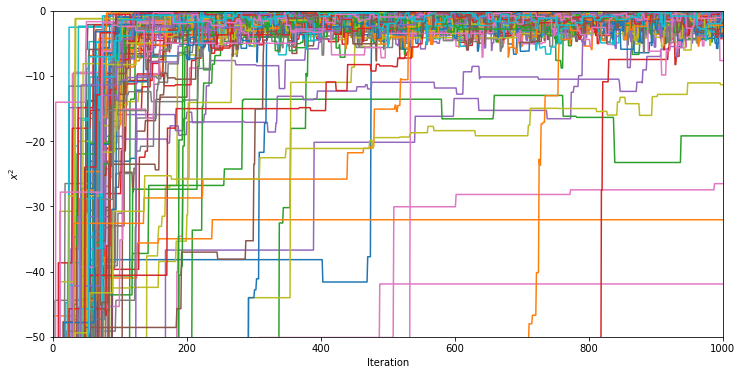

In [7]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [8]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([521., 505., 551., 479., 400., 489., 499.,   6., 510., 534., 433.,
       502., 522., 472., 532., 514., 267., 550., 516., 549., 482., 474.,
       530., 483., 447., 468., 506., 474., 430., 503., 491., 494.,  29.,
       522., 510., 513., 478., 494., 449., 527., 472., 488., 520., 544.,
       421., 475., 479., 523., 464., 499., 464.,  19., 438., 536., 522.,
       511.,  18., 482., 525., 522., 482., 500., 446., 434., 493., 500.,
       484., 475., 381., 481., 485., 468., 501., 467., 501., 461., 494.,
       507., 375., 536., 492., 535., 486., 526., 458., 519., 490., 505.,
       498., 542., 501., 415., 455., 455., 545., 466., 481., 543., 484.,
       452., 507., 527., 510., 446., 480., 465., 412., 497., 491., 487.,
       502., 401., 527., 494., 496., 474., 370.,  21., 376., 489.])

[102.33224754  91.56756572  64.66618692  60.85267524]
flat chain shape: (3960, 4)
flat log prob shape: (3960,)


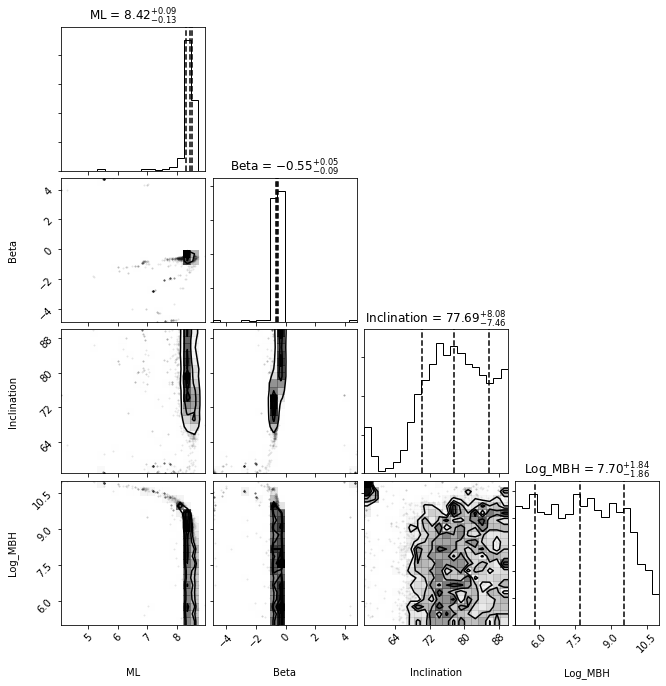

In [9]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=100, thin=100, flat=True,)
log_prob_samples = read.get_log_prob(discard=100, thin=100, flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

204 51
flat chain shape: (7560, 4)
flat log prob shape: (7560,)


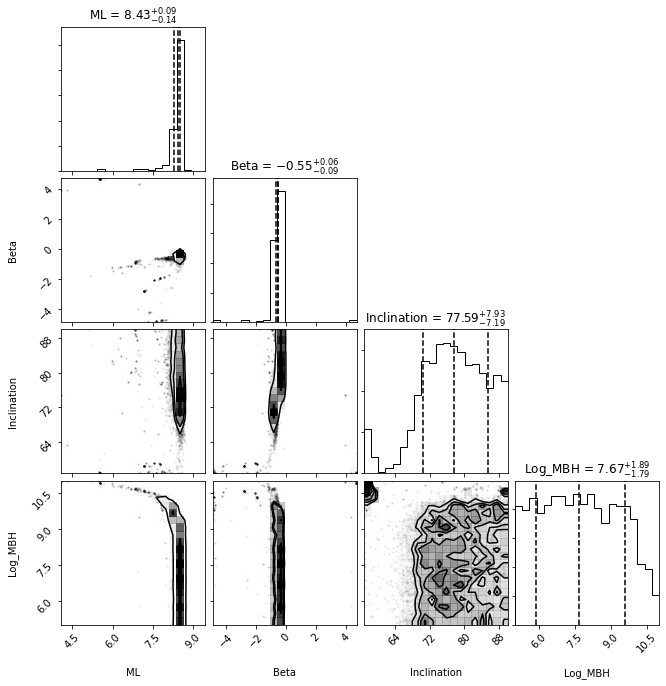

In [11]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [12]:
from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 69;
tau: [102.33224754  91.56756572  64.66618692  60.85267524]

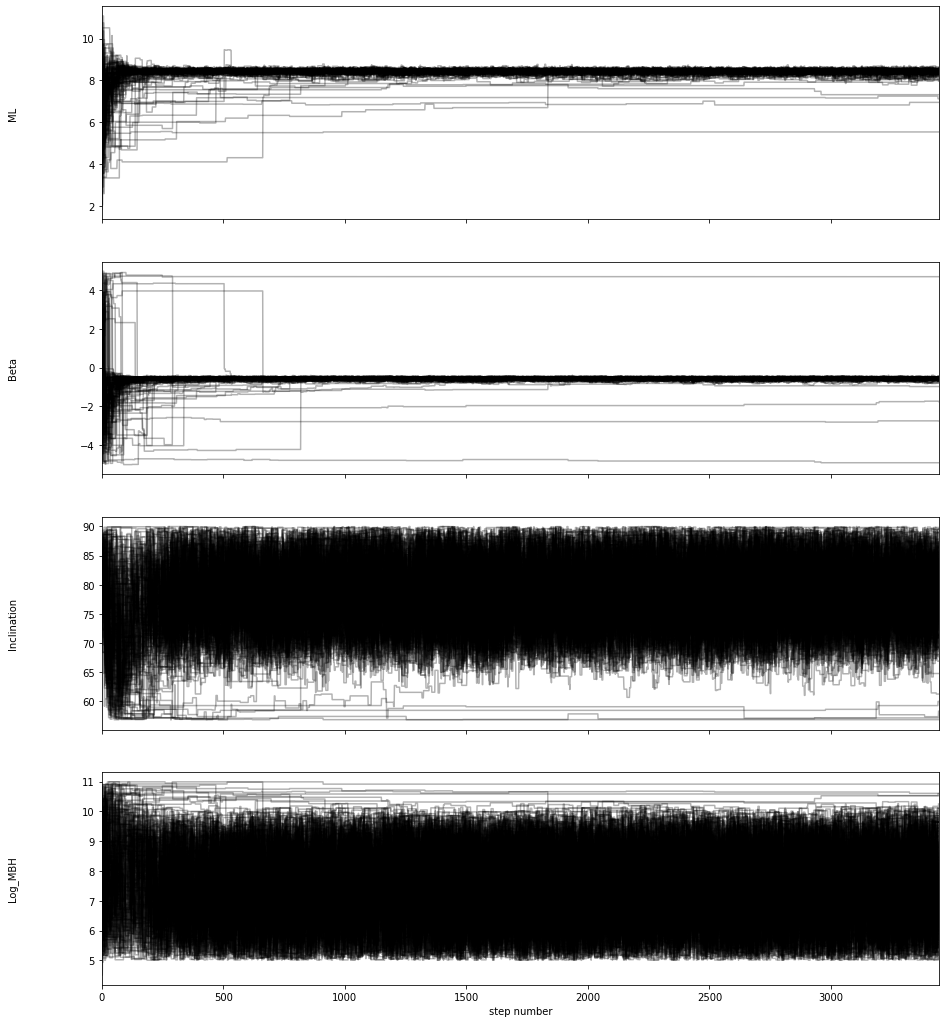

In [14]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [13]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

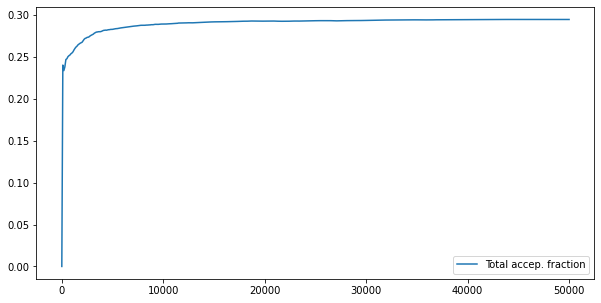

In [14]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

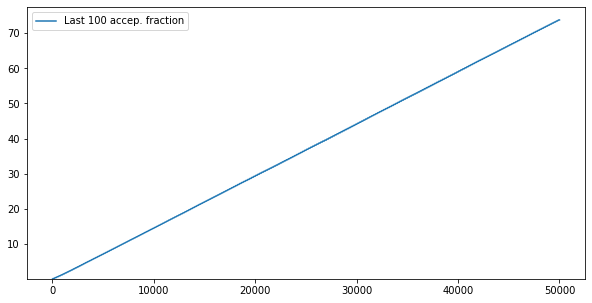

In [15]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()